In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [79]:
df = pd.read_csv('Bitcoin.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [81]:
df.dropna(axis=0,inplace=True)

In [82]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [83]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

In [84]:
df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [85]:
# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [86]:
df.dropna(axis=0,inplace=True)

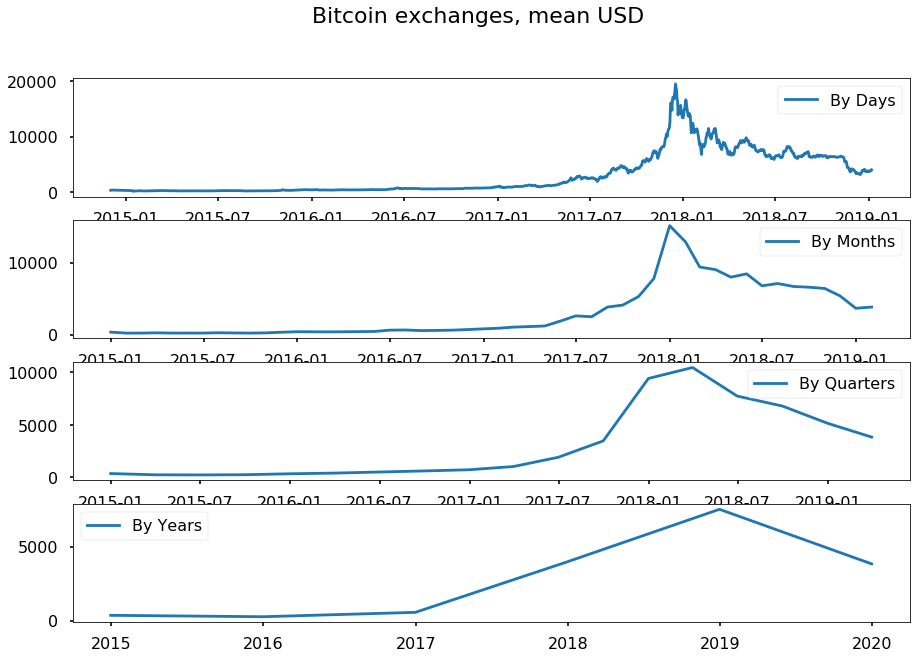

In [87]:
fig = plt.figure(figsize=[15, 10])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(411)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(412)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(413)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(414)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

Dickey–Fuller test: p=0.592162


<Figure size 1080x504 with 0 Axes>

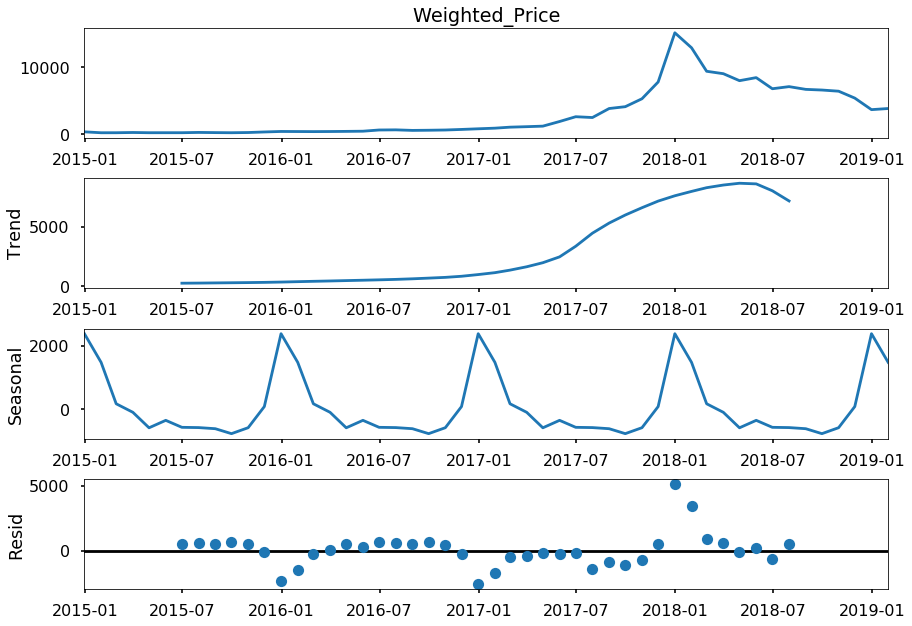

In [88]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

In [89]:
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
df_month.head()

Dickey–Fuller test: p=0.592162


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box
Timestamp,,,,,,,,
2014-12-31,367.624696,367.628664,367.054140,367.058108,0.589727,212.806380,367.348300,3.863102
2015-01-31,231.336491,233.555115,229.653439,231.797129,2.345471,586.751021,231.637236,3.672384
2015-02-28,234.332466,234.483321,234.201933,234.343998,7.415321,1752.404108,234.350704,3.677371
2015-03-31,269.897876,270.027382,269.772040,269.910322,7.979565,2151.056990,269.904893,3.737141
2015-04-30,235.712932,235.786104,235.642352,235.718787,5.923033,1391.584683,235.718184,3.679859


In [90]:
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(1)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[1:])[1])
df_month.head()

Dickey–Fuller test: p=0.000000


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,prices_box_diff
Timestamp,,,,,,,,,
2014-12-31,367.624696,367.628664,367.054140,367.058108,0.589727,212.806380,367.348300,3.863102,NaN
2015-01-31,231.336491,233.555115,229.653439,231.797129,2.345471,586.751021,231.637236,3.672384,-0.190718
2015-02-28,234.332466,234.483321,234.201933,234.343998,7.415321,1752.404108,234.350704,3.677371,0.004987
2015-03-31,269.897876,270.027382,269.772040,269.910322,7.979565,2151.056990,269.904893,3.737141,0.059771
2015-04-30,235.712932,235.786104,235.642352,235.718787,5.923033,1391.584683,235.718184,3.679859,-0.057283


Dickey–Fuller test: p=0.000000


<Figure size 1080x504 with 0 Axes>

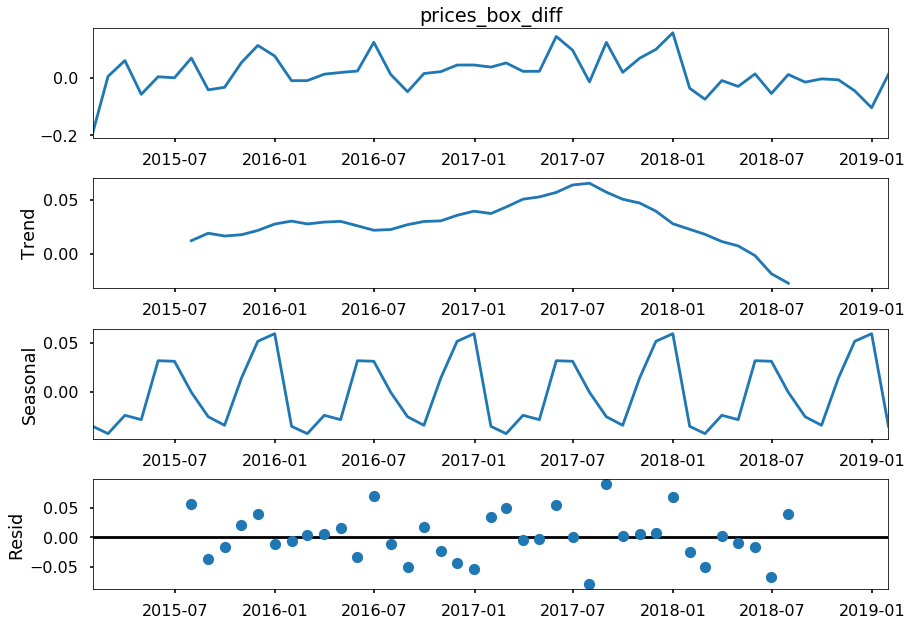

In [91]:

plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff[1:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[1:])[1])

plt.show()

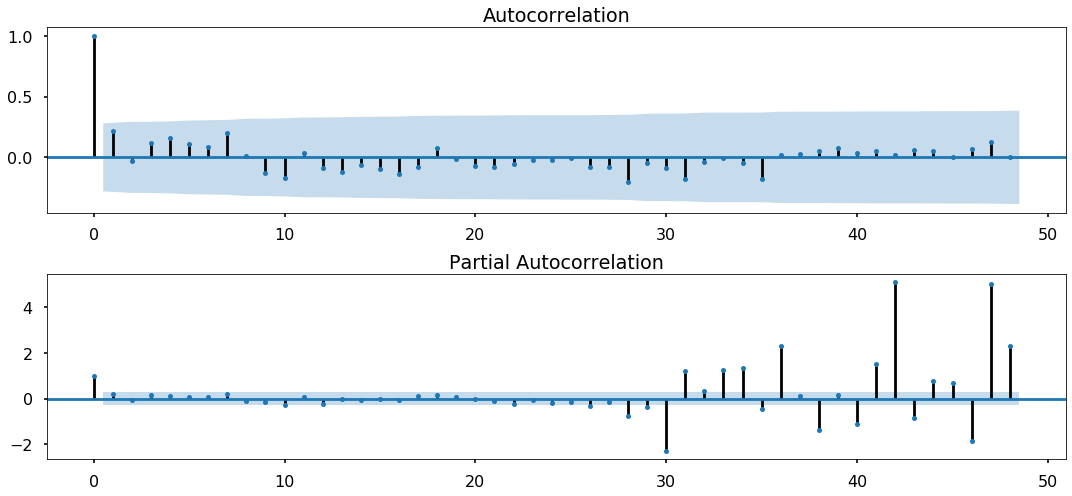

In [92]:
plt.figure(figsize=(15,7))
df.dropna(axis=0,inplace=True)
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff[1:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff[1:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()


In [93]:
df_month.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,prices_box_diff
Timestamp,,,,,,,,,
2014-12-31,367.624696,367.628664,367.054140,367.058108,0.589727,212.806380,367.348300,3.863102,NaN
2015-01-31,231.336491,233.555115,229.653439,231.797129,2.345471,586.751021,231.637236,3.672384,-0.190718
2015-02-28,234.332466,234.483321,234.201933,234.343998,7.415321,1752.404108,234.350704,3.677371,0.004987
2015-03-31,269.897876,270.027382,269.772040,269.910322,7.979565,2151.056990,269.904893,3.737141,0.059771
2015-04-30,235.712932,235.786104,235.642352,235.718787,5.923033,1391.584683,235.718184,3.679859,-0.057283


In [124]:
model=sm.tsa.statespace.SARIMAX(df_month['Weighted_Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

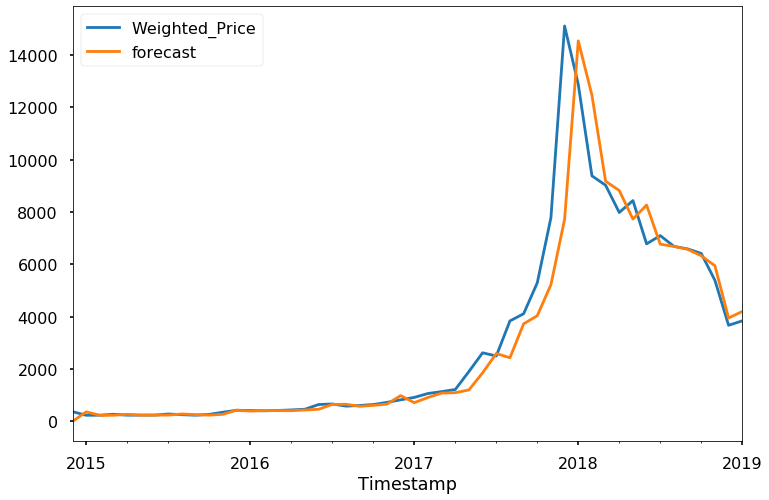

In [125]:
df_month['forecast']=results.predict()
df_month[['Weighted_Price','forecast']].plot(figsize=(12,8))

In [131]:
df_month['error']=df_month['Weighted_Price']-df_month['forecast']

In [137]:
from sklearn.metrics import r2_score

In [132]:
df_month.dropna(axis=0,inplace=True)

In [139]:
a=r2_score(df_month['Weighted_Price'],df_month['forecast'])

In [140]:
print('accuracy of model is:',a*100)

accuracy of model is: 87.47324138363115
